## Корреляция и корреляционный анализ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Загрузим датасет Mortality and Water Hardness https://www.kaggle.com/ukveteran/mortality-and-water-hardness
water = pd.read_csv('water.csv')
water.head(5)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [3]:
# Посмотрим на датасет
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


Дополнительная обработка датасета не требуется, т.к. пропуски отсутствуют.

## 1. Есть ли связь между жёсткостью воды и средней годовой смертностью?

<b>1.1. Построим точечный график</b>

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

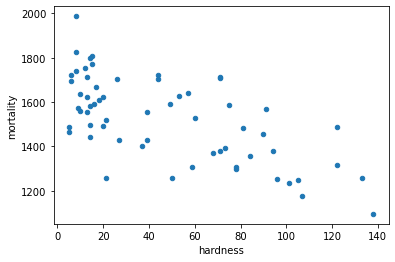

In [4]:
water.plot(kind='scatter', x='hardness', y='mortality')

Из графика видим, что с увеличением жесткости воды смертность населения сокращается.
Прослеживается линейная зависимость.

<b>2.1. Рассчитаем коэффициенты корреляции Пирсона и Спирмена</b>

In [5]:
# Коэффициент Пирсона
water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [6]:
# Коэффициент Спирмена
water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Наблюдаем среднюю обратную зависимость между переменными.

<b> 3.1. Построим модель линейной регрессии </b>

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X = water[['hardness']]
y = water['mortality']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
X_train.shape

(42, 1)

In [11]:
y_train.shape

(42,)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [13]:
model.coef_

array([-3.13167087])

In [14]:
model.intercept_

1668.9722977277095

In [15]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [16]:
# Сравним прогноз с фактом
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
0,105,1340.146856,1247
5,10,1637.655589,1558
46,14,1625.128906,1495
31,44,1531.178779,1702
13,78,1424.701970,1307
55,20,1606.338880,1625
34,133,1252.460072,1259
49,75,1434.096982,1587
12,21,1603.207209,1519
40,6,1650.182272,1696


<b> 4.1. Рассчитаем коэффициент детерминации</b>

In [17]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

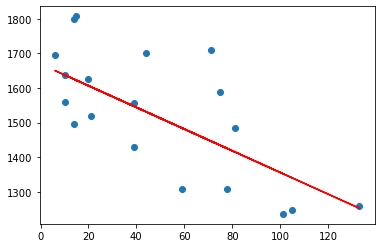

In [18]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

Коэффициент детерминации равен 0,5, что означает что модель не очень точная. 

<b> 5.1. Выведем график остатков</b>

<AxesSubplot:ylabel='mortality'>

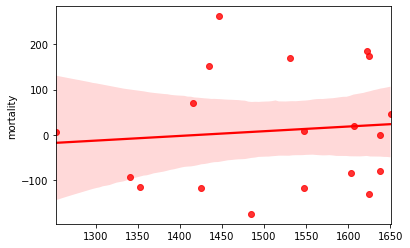

In [19]:
sns.regplot(x = y_pred, y = y_test-y_pred, data = None, scatter = True, color = 'red')

На графике остатков точки расположены хаотично, в чередовании знаков нет закономернойсти. Можно сделать вывод, что модель подобрана правильно.

## 2. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [20]:
# Разделим датасеты
water_south = water[water['location'] == 'South']
water_north = water[water['location'] == 'North']
display(water_south.head())
display(water_north.head())

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


<b> 2.1. Построим точечный график</b>

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

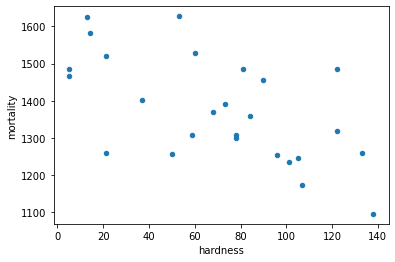

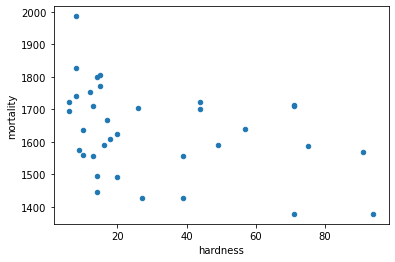

In [21]:
water_south.plot(kind='scatter', x='hardness', y='mortality')
water_north.plot(kind='scatter', x='hardness', y='mortality')

Также видим, что с увеличением жесткости воды смертность населения сокращается.
Прослеживается линейная зависимость.

<b>2.1. Рассчитаем коэффициенты корреляции Пирсона и Спирмена</b>

In [22]:
# Коэффициент Пирсона
display(water_south[['hardness', 'mortality']].corr())
display(water_north[['hardness', 'mortality']].corr())

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [23]:
# Коэффициент Спирмена
display(water_south[['hardness', 'mortality']].corr(method='spearman'))
display(water_north[['hardness', 'mortality']].corr(method='spearman'))

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


Согласно коэффициентам корреляции Пирсона и Спирмена корреляция смертности и жесткости воды больше в южном регионе, чем в северном. Мы наблюдаем обратную зависимость между показателями.

<b> 3.1. Построим модель линейной регрессии </b>

   <b> 3.1.1. Для южного региона </b>

In [24]:
X_s = water_south[['hardness']]
y_s = water_south['mortality']

In [25]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.30, random_state=42)

In [26]:
X_train_s.shape

(18, 1)

In [27]:
y_train_s.shape

(18,)

In [28]:
model_s = LinearRegression()
model_s.fit(X_train_s, y_train_s)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [29]:
model_s.coef_

array([-3.51342921])

In [30]:
model_s.intercept_

1640.2204603423374

In [31]:
y_pred_s = model.predict(X_test_s)
y_pred_s

array([1286.90845133, 1653.31394337, 1340.14685615, 1286.90845133,
       1553.10047546, 1603.20720941, 1484.20371627, 1653.31394337])

In [32]:
# Сравним прогноз с фактом
res_df_s = X_test_s.copy()

res_df_s['y_pred'] = y_pred_s
res_df_s['y_test'] = y_test_s
res_df_s

,hardness,y_pred,y_test
18,122,1286.908451,1318
38,5,1653.313943,1486
0,105,1340.146856,1247
58,122,1286.908451,1486
27,37,1553.100475,1402
19,21,1603.207209,1260
33,59,1484.203716,1309
2,5,1653.313943,1466


<b> 3.2. Для северного региона </b>

In [33]:
X_n = water_north[['hardness']]
y_n = water_north['mortality']

In [34]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.30, random_state=42)

In [35]:
X_train_n.shape

(24, 1)

In [36]:
y_train_n.shape

(24,)

In [37]:
model_n = LinearRegression()
model_n.fit(X_train_n, y_train_n)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [38]:
model_n.coef_

array([-1.97686226])

In [39]:
model_n.intercept_

1688.150229031281

In [40]:
y_pred_n = model.predict(X_test_n)
y_pred_n

array([1643.91893075, 1640.78725988, 1625.12890552, 1650.18227249,
       1618.86556377, 1446.62366581, 1531.17877935, 1643.91893075,
       1546.83713371, 1621.99723465, 1546.83713371])

In [41]:
# Сравним прогноз с фактом
res_df_n = X_test_n.copy()

res_df_n['y_pred'] = y_pred_n
res_df_n['y_test'] = y_test_n
res_df_n

,hardness,y_pred,y_test
45,8,1643.918931,1987
23,9,1640.787260,1574
43,14,1625.128906,1444
36,6,1650.182272,1724
26,16,1618.865564,1591
50,71,1446.623666,1713
31,44,1531.178779,1702
22,8,1643.918931,1742
16,39,1546.837134,1555
28,15,1621.997235,1772


<b> 4.1. Рассчитаем коэффициент детерминации</b>

In [42]:
# для модели южного региона
model_s.score(X_test_s, y_test_s) # метод возвращает значение коэффициента детерминации

-2.5519223012352077

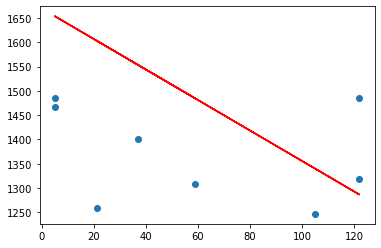

In [43]:
plt.scatter(X_test_s, y_test_s)
plt.plot(X_test_s, y_pred_s, c='r')

Коэффииент детерминации принимает отрицательное значение, что говорит нам о плохой модели. Модель имеет плохое качество, т.к. мало данных для обучения модели.

In [44]:
# Для модели северного региона
model_n.score(X_test_n, y_test_n) # метод возвращает значение коэффициента детерминации

0.018885304285745863

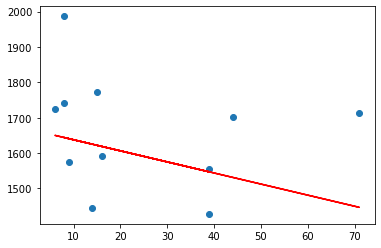

In [45]:
plt.scatter(X_test_n, y_test_n)
plt.plot(X_test_n, y_pred_n, c='r')

Коэффициент детерминации близок к 0, что также говорит нам о плохой модели. Плохое качество модели объясняется малым количеством данных для обучения модели.

<b> 5.2. Выведем график остатков</b>

<AxesSubplot:ylabel='mortality'>

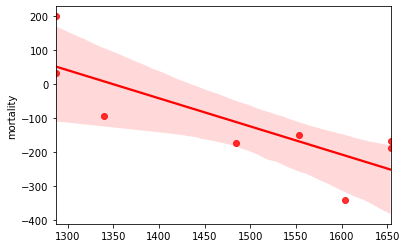

In [48]:
# График остатков для южного региона
sns.regplot(x = y_pred_s, y = y_test_s-y_pred_s, data = None, scatter = True, color = 'red')

На графике остатков южного региона видим некоторую закономерность в чередовании знаков. Точек слишком мало и возможно, при большем количестве данных график имел бы другой вид. Если делать вывод по данному графику, то модель подобрана не верно.

<AxesSubplot:ylabel='mortality'>

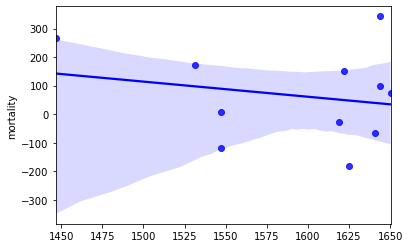

In [47]:
# График остатков для северного региона
sns.regplot(x = y_pred_n, y = y_test_n-y_pred_n, data = None, scatter = True, color = 'blue')

На графике остатков северного региона точки расположены хаотично, отсутствуют закономерности в чередовании знаков. Можно сделать вывод, что модель подобрана правильно.

<b>Вывод:</b> для качественного построения модели регрессии необходимо большое количество данных. Мы видим, что на полном датасете качество модели выше. При построении моделей регрессии по каждому региону качество этих моделей заметно ухудшается. Использовать такие модели нельзя.
